# **Import Libraries and modules**

In [3]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)
3


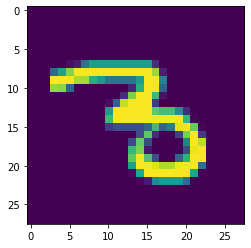

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[30])
print(y_train[30])


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(128, 3,3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(256, 1))
model.add(Convolution2D(512, 3, activation='relu'))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 256)         33024     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 512)        

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=5, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/5





60000/60000 [==============================] - 42s 706us/step - loss: 0.1012 - acc: 0.9687
Epoch 2/5
60000/60000 [==============================] - 33s 553us/step - loss: 0.0425 - acc: 0.9876
Epoch 3/5
60000/60000 [==============================] - 33s 554us/step - loss: 0.0310 - acc: 0.9908
Epoch 4/5
60000/60000 [==============================] - 33s 554us/step - loss: 0.0267 - acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 33s 553us/step - loss: 0.0211 - acc: 0.9934


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
print(score)

[0.03423821484413848, 0.9904]


In [0]:
y_pred = model.predict(X_test)

In [20]:
print(y_pred[:9])
print(y_test[:9])

[[2.4301040e-18 2.8841376e-17 3.5927172e-13 2.3884979e-11 2.1792206e-18
  1.2824709e-19 2.4512672e-25 1.0000000e+00 4.6006517e-14 5.6953133e-14]
 [2.0369623e-16 5.1347353e-15 1.0000000e+00 5.1181752e-21 3.5513176e-15
  2.4399788e-25 6.2446015e-17 2.2462715e-17 5.6907657e-17 8.8842801e-24]
 [3.3873799e-13 9.9999917e-01 1.0799436e-12 1.9023699e-14 7.4369336e-07
  1.1804129e-11 3.3618306e-11 5.1968819e-08 9.2815672e-11 6.2597669e-09]
 [9.9999988e-01 2.1509827e-14 1.1461509e-08 1.1338423e-11 1.4332872e-10
  9.5901811e-12 8.6421402e-08 2.4049016e-13 2.9516944e-09 1.0166268e-09]
 [7.7902361e-16 9.3857438e-17 2.4604152e-14 5.5560957e-18 1.0000000e+00
  1.5913474e-14 5.0137498e-12 1.1791012e-16 7.3165405e-14 1.0846677e-12]
 [1.4342506e-12 9.9999952e-01 2.2232929e-12 3.2834408e-15 4.1061185e-07
  9.6173200e-13 1.1030397e-11 7.2275639e-09 6.1700541e-11 1.0470311e-08]
 [1.7101810e-18 1.0691177e-12 1.7925120e-13 3.0731914e-17 9.9999881e-01
  4.9832194e-11 8.6138506e-17 1.6407209e-10 9.8370612e-10 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [22]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7fab6e4ecac8>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7fab6ed6e390>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7fab6ed6e320>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7fab6ed395c0>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7fab6e4cecf8>,
 'conv2d_5': <keras.layers.convolutional.Conv2D at 0x7fab6e4d3860>,
 'conv2d_6': <keras.layers.convolutional.Conv2D at 0x7fab6e4dc978>,
 'flatten_1': <keras.layers.core.Flatten at 0x7fab6e4e44e0>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7fab6ed6e7f0>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x7fab6e4c9b70>}

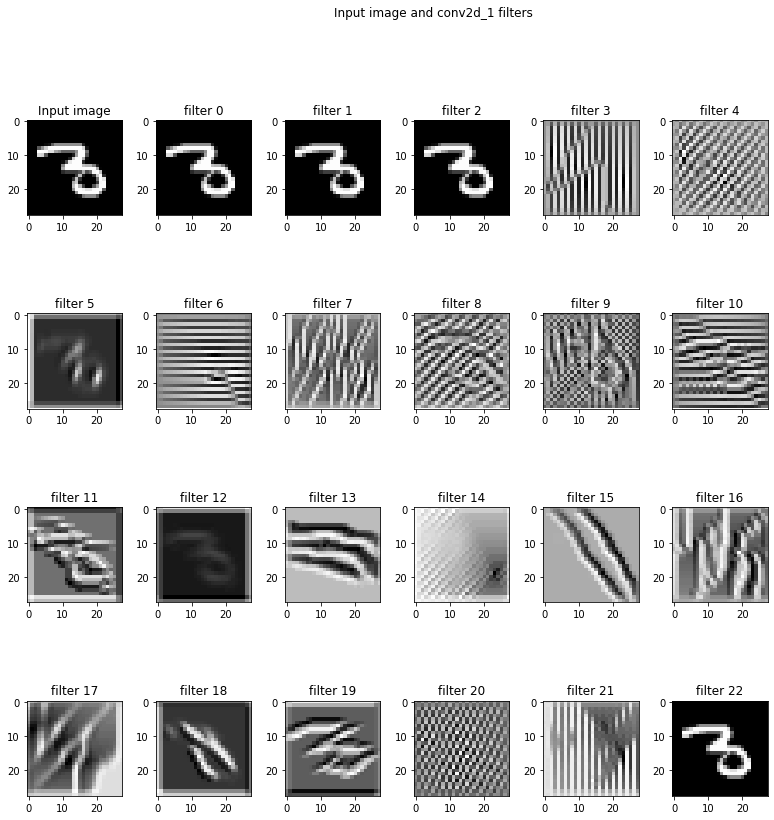

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[30]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()